# STUDENT PERFORMANCE

In [1]:
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
#sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import time
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
pd.options.display.max_colwidth = 1000
from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()
pd.options.display.max_rows = 100

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

# Read the data

In [6]:
import pandas as pd
data = pd.read_csv('xAPI-Edu-Data.csv')
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# Describe the data

In [3]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [4]:
data.head(n=2).T

,0,1
gender,M,M
NationalITy,KW,KW
PlaceofBirth,KuwaIT,KuwaIT
StageID,lowerlevel,lowerlevel
GradeID,G-04,G-04
SectionID,A,A
Topic,IT,IT
Semester,F,F
Relation,Father,Father
raisedhands,15,20


In [5]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


# Categorical features

In [6]:
categorical_features = (data.select_dtypes(include=['object']).columns.values)
categorical_features

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

# Numerical Features

In [7]:
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype=object)

# Pivot tables

In [8]:
pivot = pd.pivot_table(df,
            values = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'],
            index = ['gender', 'NationalITy', 'PlaceofBirth'], 
                       columns= ['ParentschoolSatisfaction'],
                       aggfunc=[np.mean], 
                       margins=True).fillna('')
pivot

mean                       \
                                raisedhands                        
ParentschoolSatisfaction                Bad     Good         All   
gender NationalITy PlaceofBirth                                    
F      Egypt       Egypt                        57.5   57.500000   
       Iran        Iran                            2    2.000000   
       Iraq        Iraq                      62.8333   62.833333   
       Jordan      Egypt                100           100.000000   
                   Jordan           31.6087  58.9583   50.098592   
                   KuwaIT                         87   87.000000   
                   Palestine                    77.5   77.500000   
                   USA                   60            60.000000   
                   lebanon              100       75   83.333333   
       KW          KuwaIT           38.3043  47.3103   43.326923   
                   USA                   60       70   65.000000   
       Lybia       Lybia                         9.5    9.500000   
       Morocco     Morocco                        72   72.000000   
       Palestine   Jordan                    79.1667   79.166667   
                   Palestine                      76   76.000000   
       SaudiArabia SaudiArabia           66       50   60.666667   
                   USA                  100           100.000000   
       Syria       Syria                          88   88.000000   
       Tunis       USA                            70   70.000000   
       USA         USA                   15       54   44.250000   
       lebanon     lebanon            48.75  78.1429   67.454545   
M      Egypt       Egypt                 49       39   40.666667   
                   KuwaIT                12            12.000000   
       Iran        Iran             29.3333     17.5   24.600000   
       Iraq        Iraq                       77.875   77.875000   
       Jordan      Jordan           31.4848  52.1667   43.740741   
                   Palestine                      74   74.000000   
                   SaudiArabia      61.3333       12   44.888889   
                   USA                  100           100.000000   
       KW          KuwaIT           29.9091  36.7966   33.160000   
       Lybia       Lybia                          15   15.000000   
       Morocco     Morocco          53.6667            53.666667   
       Palestine   Jordan                     82.125   82.125000   
                   Palestine                    85.5   85.500000   
       SaudiArabia SaudiArabia            7       75   52.333333   
                   USA                   50       23   43.250000   
       Syria       Jordan                          9    9.000000   
                   Syria               25.5     19.5   22.500000   
       Tunis       KuwaIT                22            22.000000   
                   SaudiArabia           70            70.000000   
                   Tunis               24.6    61.75   41.111111   
       USA         USA                            37   37.000000   
       lebanon     Jordan                         87   87.000000   
                   lebanon          23.3333     78.5   45.400000   
       venzuela    venzuela                       80   80.000000   
All                                 35.3936  54.1027   46.775000   

                                                                      \
                                VisITedResources                       
ParentschoolSatisfaction                     Bad     Good        All   
gender NationalITy PlaceofBirth                                        
F      Egypt       Egypt                               67  67.000000   
       Iran        Iran                                 9   9.000000   
       Iraq        Iraq                              90.5  90.500000   
       Jordan      Egypt                      80           80.000000   
                   Jordan                36.2609  84.2083  68.

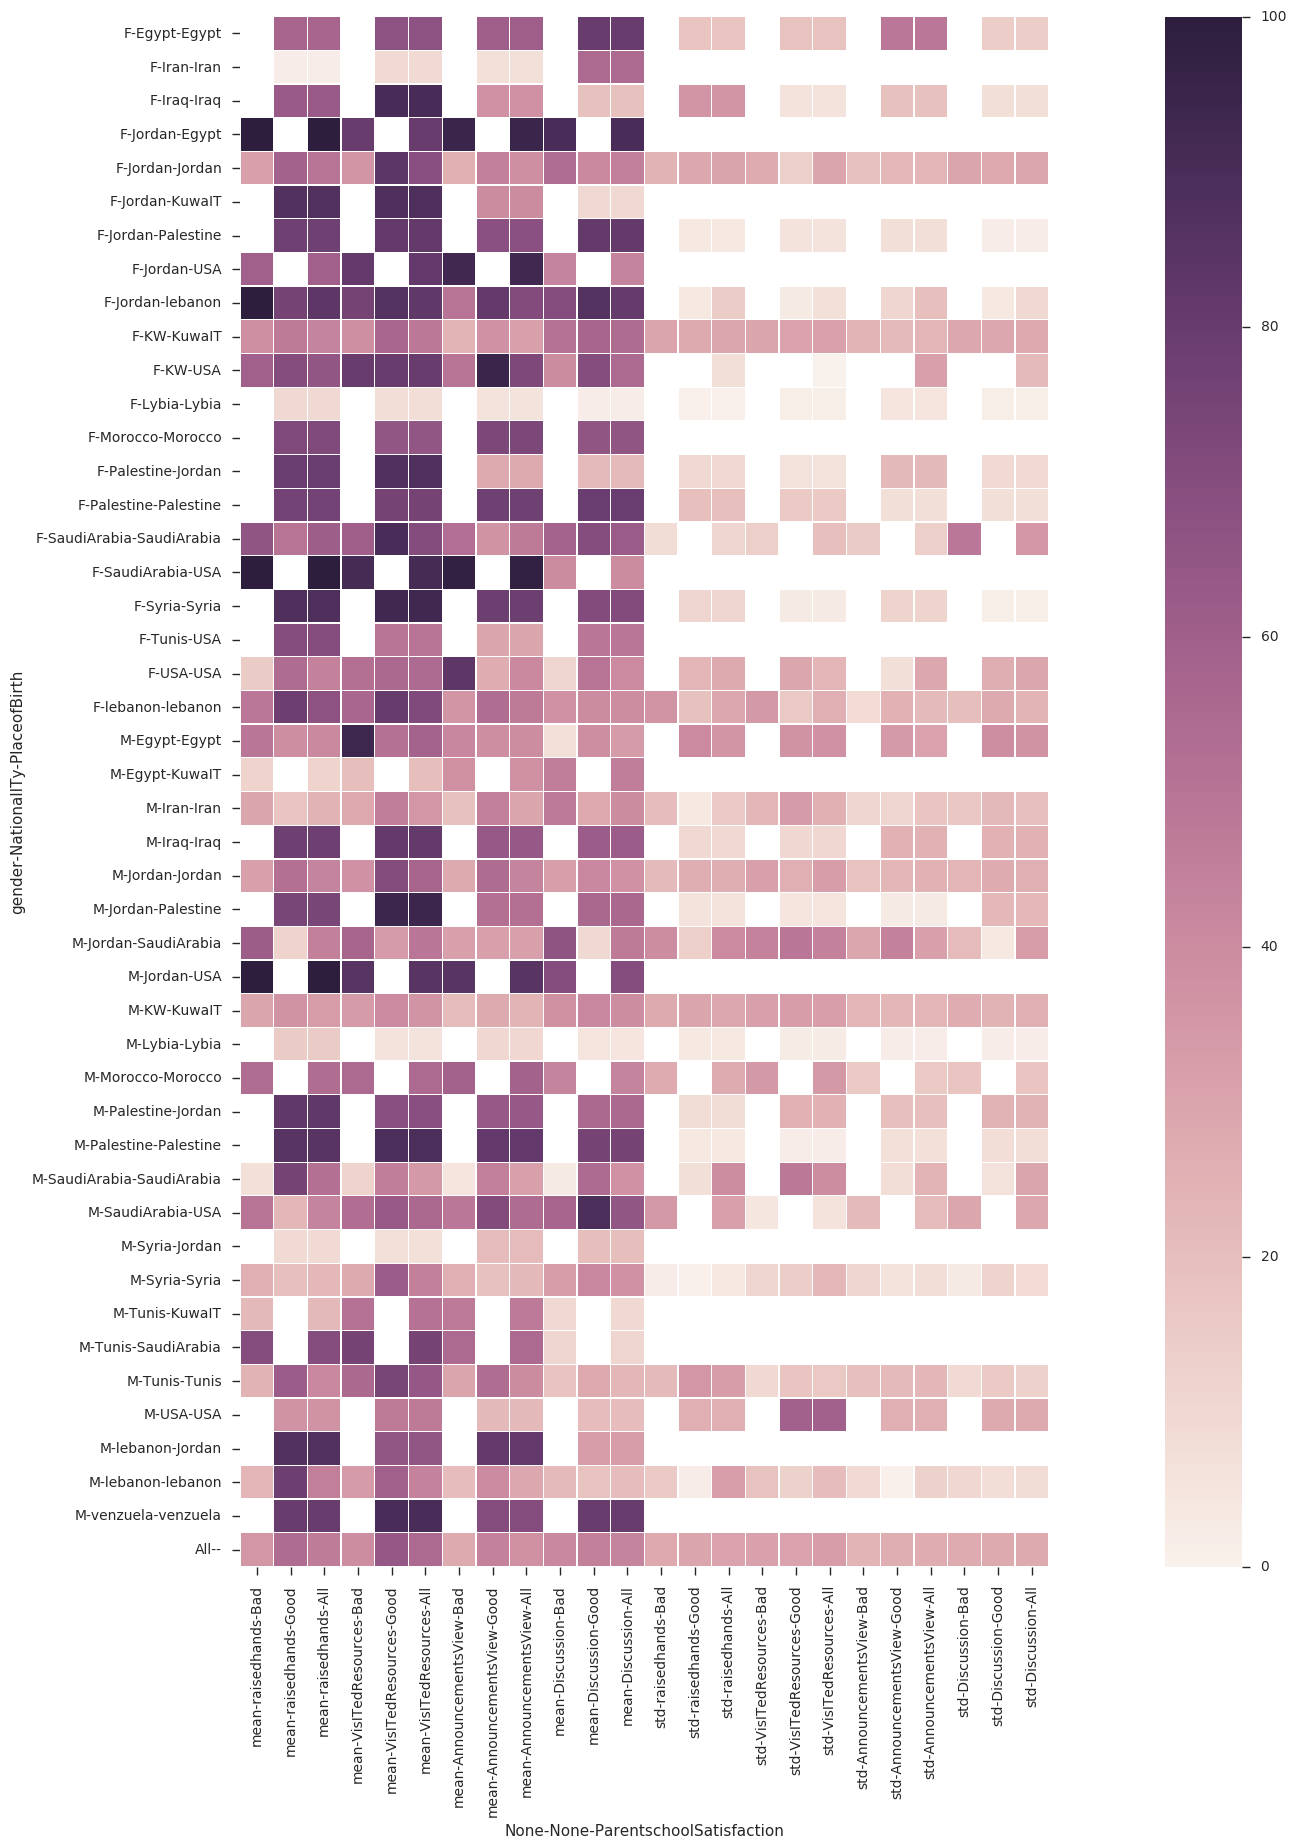

In [9]:
pivot = pd.pivot_table(df,
            values = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'],
            index = ['gender', 'NationalITy', 'PlaceofBirth'], 
                       columns= ['ParentschoolSatisfaction'],
                       aggfunc=[np.mean, np.std], 
                       margins=True)
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
plt.subplots(figsize = (30, 20))
sns.heatmap(pivot,linewidths=0.2,square=True )

# Simple plots

# Correlations

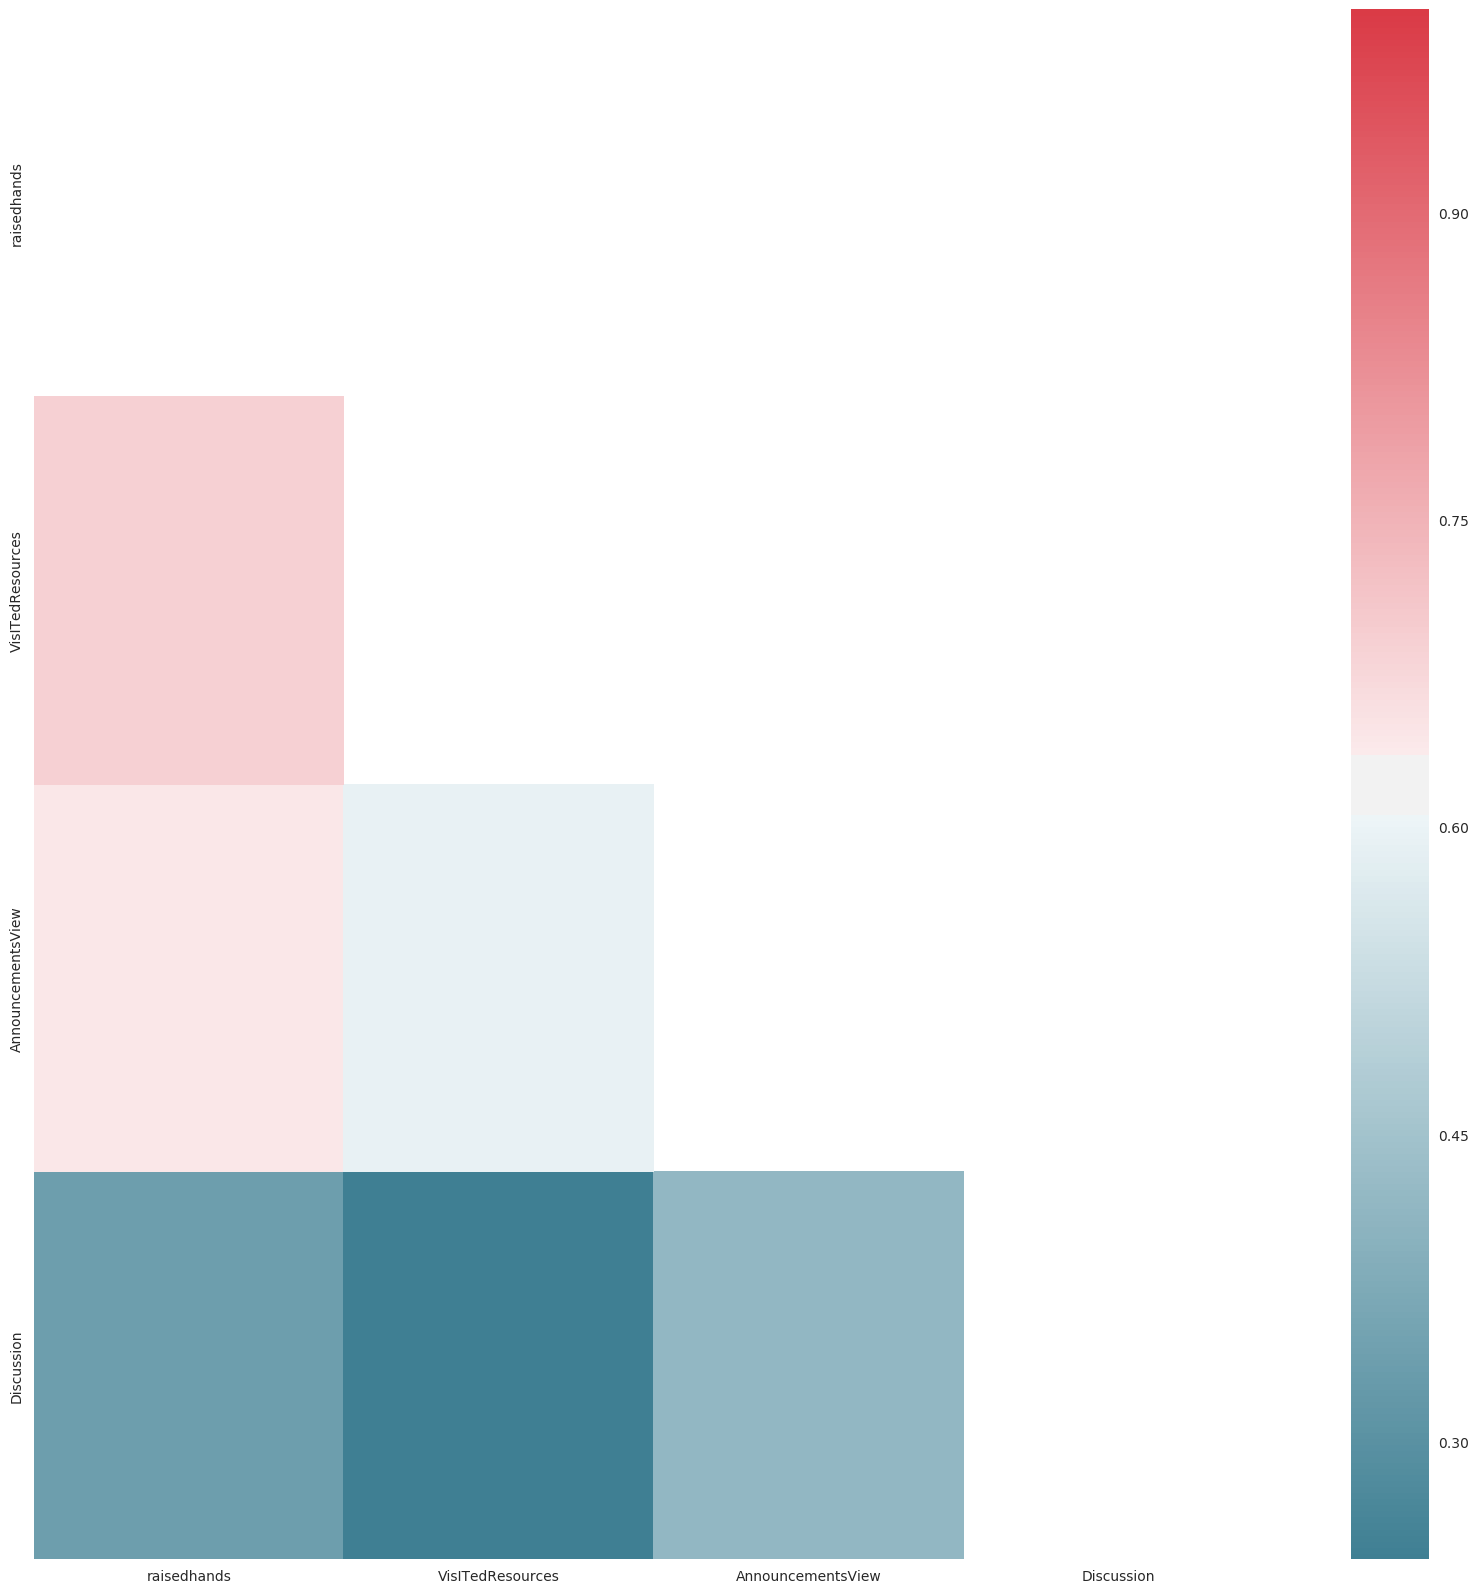

In [10]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(20, 20))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = df.corr()
#variable_correlations
heat_map(variable_correlations)

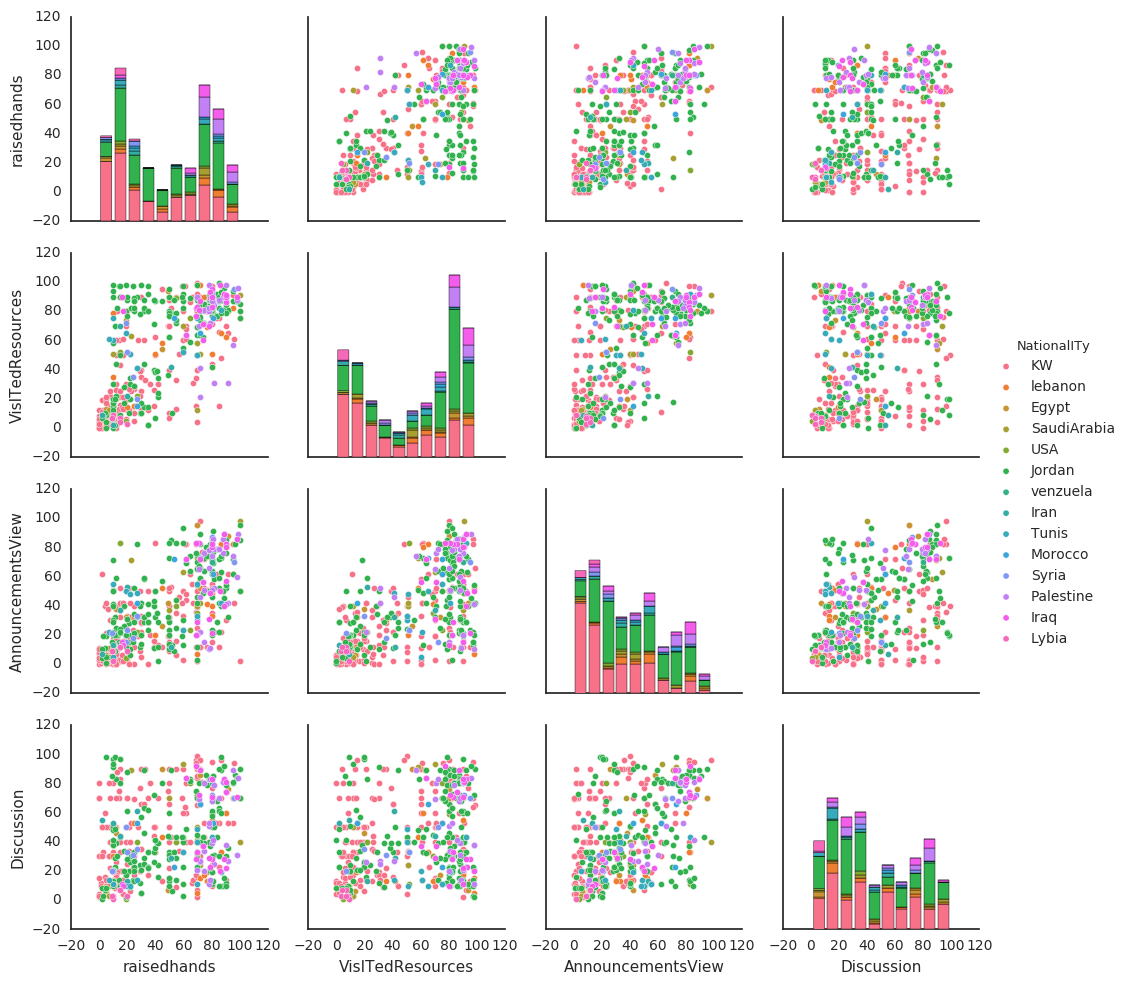

In [11]:
df_small = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'NationalITy']]
sns.pairplot(df_small, hue='NationalITy')

In [12]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

# Complex plots

# Modify the original dataframe itself to make variables as numbers.

In [13]:
mod_df = df 

gender_map = {'M':1, 
              'F':2}

NationalITy_map = {  'Iran': 1,
                     'SaudiArabia': 2,
                     'USA': 3,
                     'Egypt': 4,
                     'Lybia': 5,
                     'lebanon': 6,
                     'Morocco': 7,
                     'Jordan': 8,
                     'Palestine': 9,
                     'Syria': 10,
                     'Tunis': 11,
                     'KW': 12,
                     'KuwaIT': 12,
                     'Iraq': 13,
                     'venzuela': 14}
PlaceofBirth_map =  {'Iran': 1,
                     'SaudiArabia': 2,
                     'USA': 3,
                     'Egypt': 4,
                     'Lybia': 5,
                     'lebanon': 6,
                     'Morocco': 7,
                     'Jordan': 8,
                     'Palestine': 9,
                     'Syria': 10,
                     'Tunis': 11,
                     'KW': 12,
                     'KuwaIT': 12,
                     'Iraq': 13,
                     'venzuela': 14}

StageID_map = {'HighSchool':1, 
               'lowerlevel':2, 
               'MiddleSchool':3}

GradeID_map =   {'G-02':2,
                 'G-08':8,
                 'G-09':9,
                 'G-04':4,
                 'G-05':5,
                 'G-06':6,
                 'G-07':7,
                 'G-12':12,
                 'G-11':11,
                 'G-10':10}

SectionID_map = {'A':1, 
                 'C':2, 
                 'B':3}

Topic_map  =    {'Biology' : 1,
                 'Geology' : 2,
                 'Quran' : 3,
                 'Science' : 4,
                 'Spanish' : 5,
                 'IT' : 6,
                 'French' : 7,
                 'English' :8,
                 'Arabic' :9,
                 'Chemistry' :10,
                 'Math' :11,
                 'History' : 12}
Semester_map = {'S':1, 
                'F':2}

Relation_map = {'Mum':2, 
                'Father':1} 

ParentAnsweringSurvey_map = {'Yes':1,
                             'No':0}

ParentschoolSatisfaction_map = {'Bad':0,
                                'Good':1}

StudentAbsenceDays_map = {'Under-7':0,
                          'Above-7':1}

Class_map = {'H':10,
             'M':5,
             'L':2}

mod_df.gender  = mod_df.gender.map(gender_map)
mod_df.NationalITy     = mod_df.NationalITy.map(NationalITy_map)
mod_df.PlaceofBirth     = mod_df.PlaceofBirth.map(PlaceofBirth_map)
mod_df.StageID       = mod_df.StageID.map(StageID_map)
mod_df.GradeID = mod_df.GradeID.map(GradeID_map)
mod_df.SectionID    = mod_df.SectionID.map(SectionID_map)
mod_df.Topic     = mod_df.Topic.map(Topic_map)
mod_df.Semester   = mod_df.Semester.map(Semester_map)
mod_df.Relation   = mod_df.Relation.map(Relation_map)
mod_df.ParentAnsweringSurvey   = mod_df.ParentAnsweringSurvey.map(ParentAnsweringSurvey_map)
mod_df.ParentschoolSatisfaction   = mod_df.ParentschoolSatisfaction.map(ParentschoolSatisfaction_map)
mod_df.StudentAbsenceDays   = mod_df.StudentAbsenceDays.map(StudentAbsenceDays_map)
mod_df.Class  = mod_df.Class.map(Class_map)
#mod_df.to_csv(path + 'mod_df.csv')

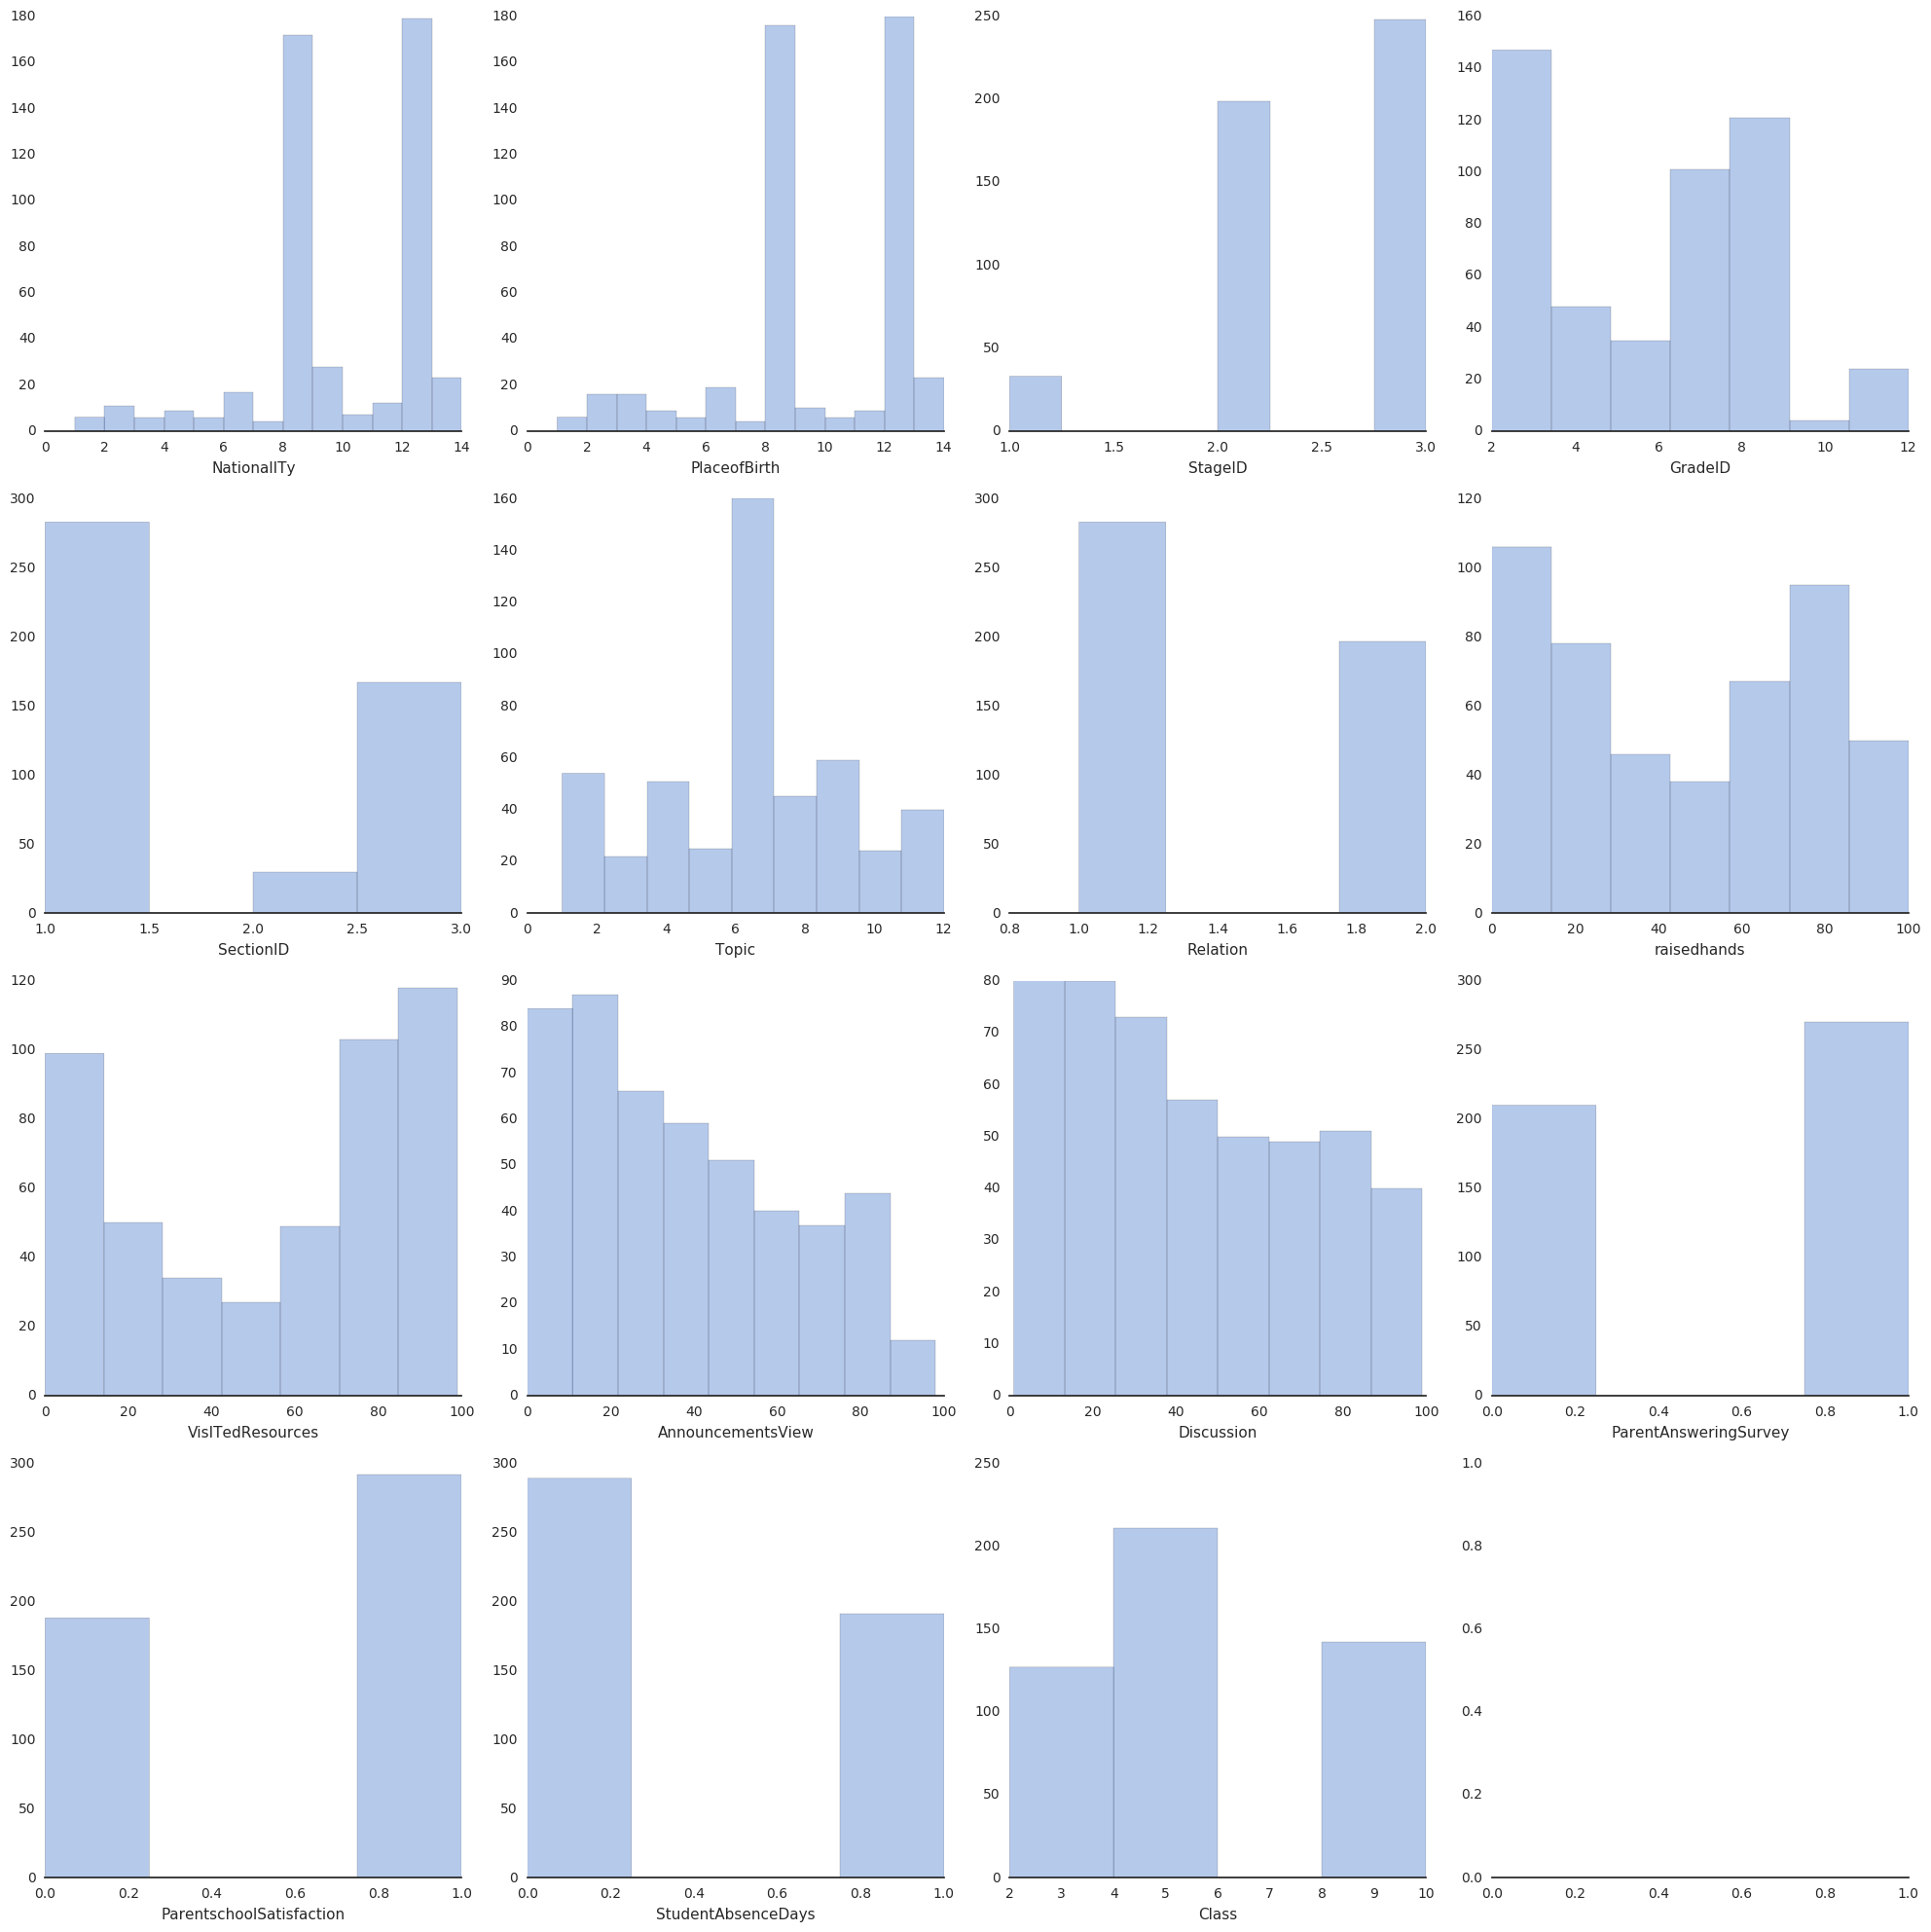

In [14]:
#data = df
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(4, 4, figsize=(20,20))
sns.despine(left=True)
sns.distplot(df['NationalITy'],  kde=False, color="b", ax=axes[0, 0])
sns.distplot(df['PlaceofBirth'],        kde=False, color="b", ax=axes[0, 1])
sns.distplot(df['StageID'],        kde=False, color="b", ax=axes[0, 2])
sns.distplot(df['GradeID'],        kde=False, color="b", ax=axes[0, 3])
sns.distplot(df['SectionID'], kde=False, color="b", ax=axes[1, 0])
sns.distplot(df['Topic'],  kde=False, color="b", ax=axes[1, 1])
sns.distplot(df['Relation'],     kde=False, color="b", ax=axes[1, 2])
sns.distplot(df['raisedhands'],  kde=False, color="b", ax=axes[1, 3])
sns.distplot(df['VisITedResources'],      kde=False, color="b", ax=axes[2, 0])
sns.distplot(df['AnnouncementsView'],      kde=False, color="b", ax=axes[2, 1])
sns.distplot(df['Discussion'],    kde=False, color="b", ax=axes[2, 2])
sns.distplot(df['ParentAnsweringSurvey'],    kde=False, color="b", ax=axes[2, 3])
sns.distplot(df['ParentschoolSatisfaction'],kde=False, color="b", ax=axes[3, 0])
sns.distplot(df['StudentAbsenceDays'],       kde=False, color="b", ax=axes[3, 1])
sns.distplot(df['Class'],      kde=False, color="b", ax=axes[3, 2])
#sns.distplot(df['Fedu'],      kde=False, color="b", ax=axes[3, 3])
plt.tight_layout()

In [15]:
categorical_features = (mod_df.select_dtypes(include=['object']).columns.values)
categorical_features

array([], dtype=object)

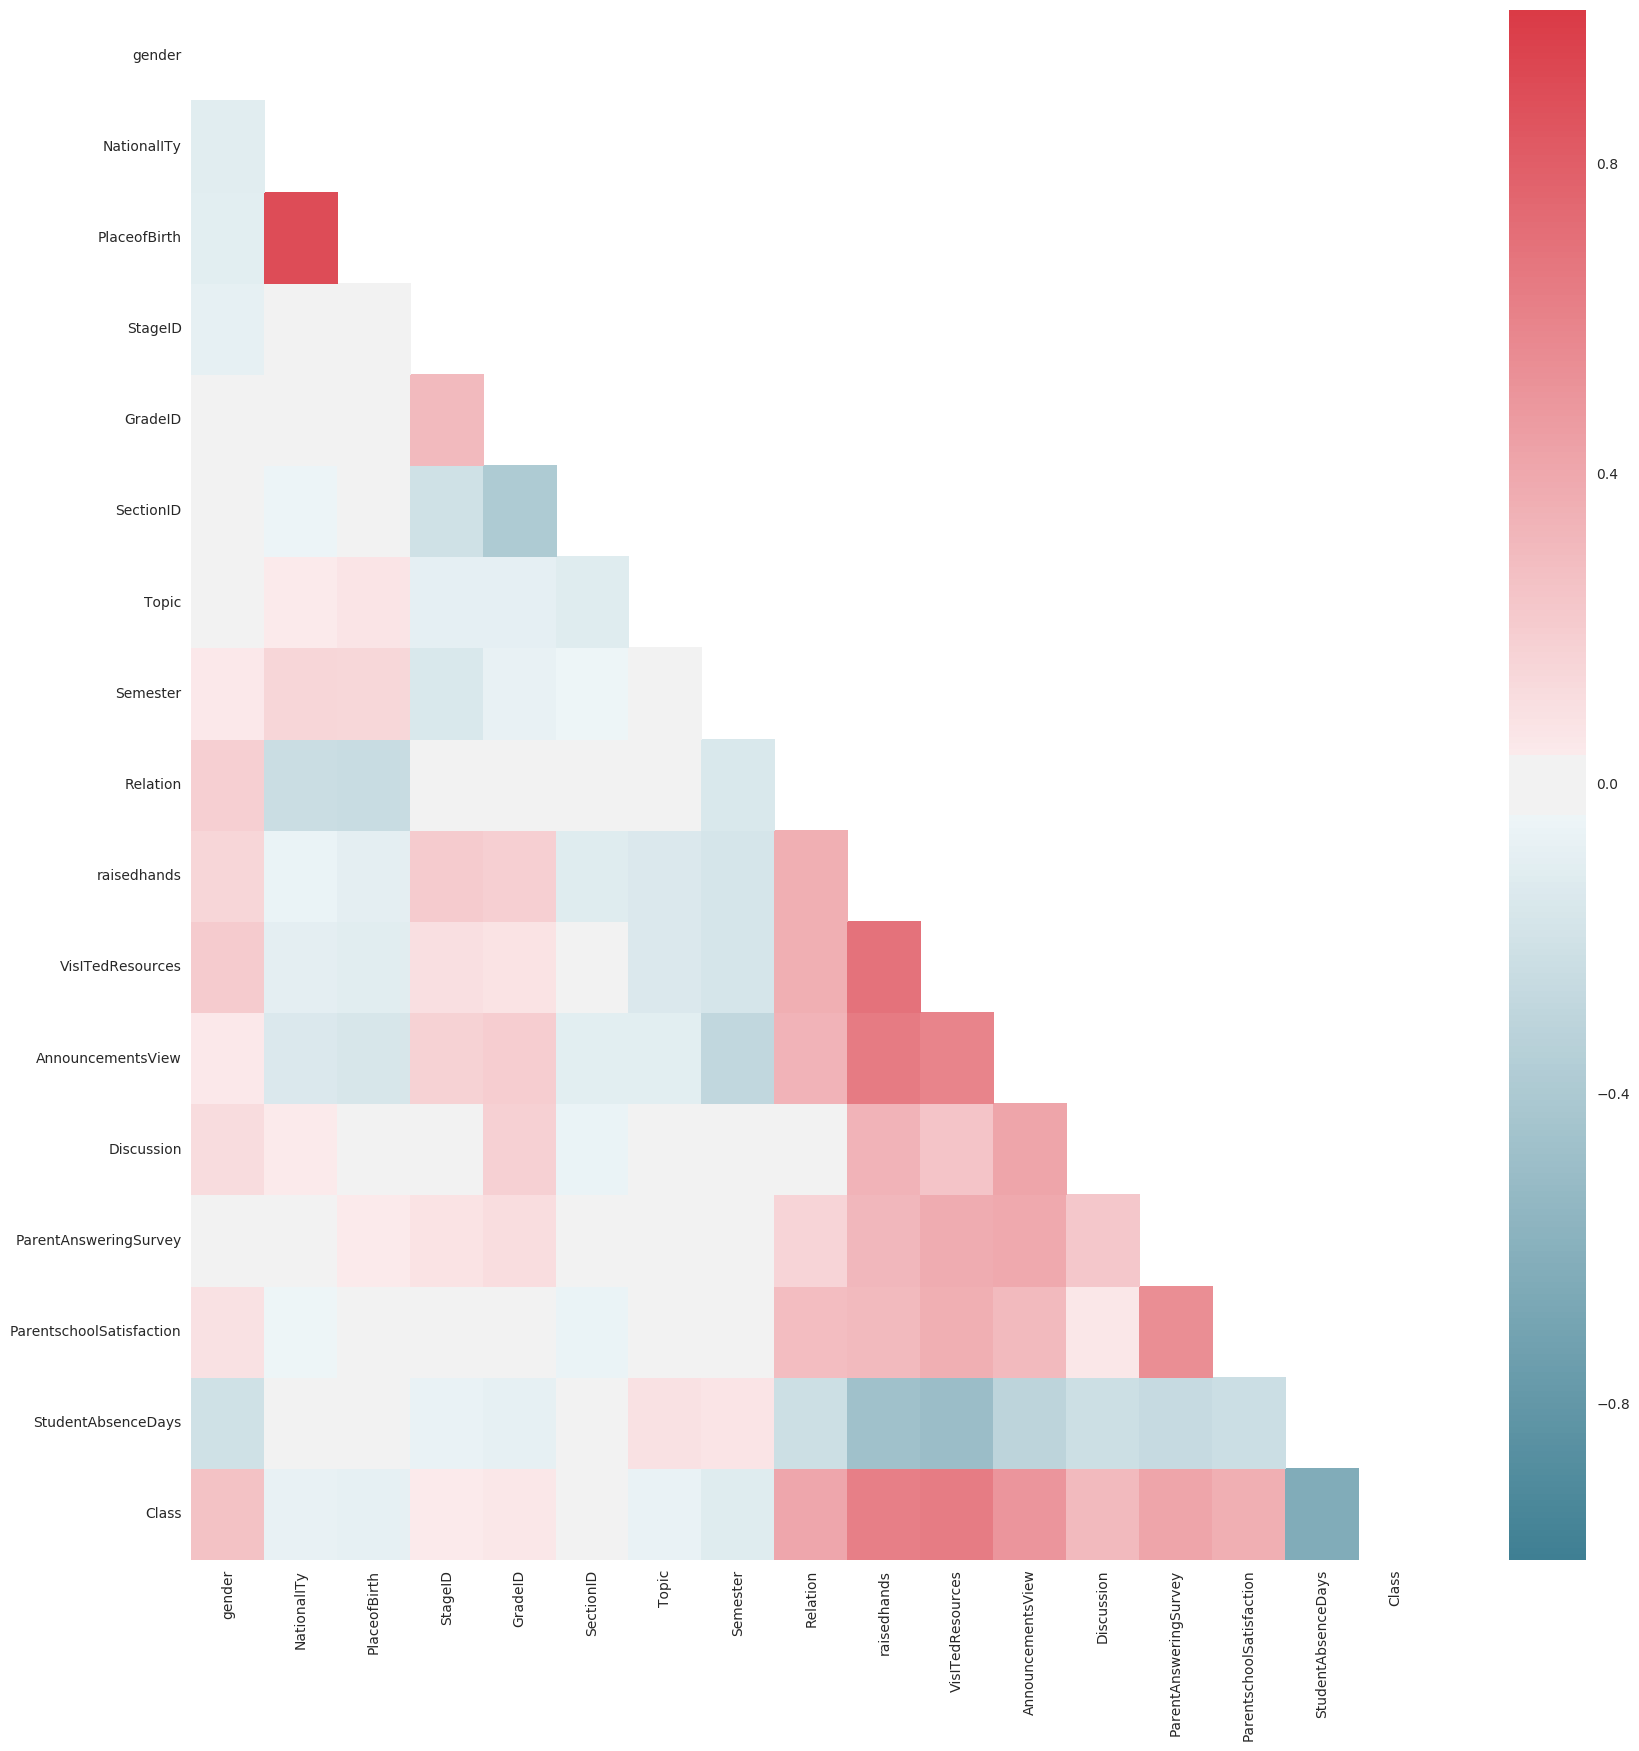

In [16]:
mod_df_variable_correlations = mod_df.corr()
#variable_correlations
heat_map(mod_df_variable_correlations)

# Machine learning

In [17]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import svm

df_copy = pd.get_dummies(mod_df)

df1 = df_copy
y = np.asarray(df1['ParentschoolSatisfaction'], dtype="|S6")
df1 = df1.drop(['ParentschoolSatisfaction'],axis=1)
X = df1.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)

radm = RandomForestClassifier()
radm.fit(Xtrain, ytrain)

clf = radm
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , 
                                      indices[f], 
                                      df1.columns[indices[f]], 
                                      radm.feature_importances_[indices[f]]))

Feature ranking:
1. feature 13 ParentAnsweringSurvey (0.162052)
2. feature 11 AnnouncementsView (0.118803)
3. feature 9 raisedhands (0.106692)
4. feature 15 Class (0.085987)
5. feature 5 SectionID (0.069025)
6. feature 10 VisITedResources (0.068801)
7. feature 6 Topic (0.067943)
8. feature 12 Discussion (0.060582)
9. feature 1 NationalITy (0.051178)
10. feature 4 GradeID (0.048779)
11. feature 2 PlaceofBirth (0.039574)
12. feature 14 StudentAbsenceDays (0.036886)
13. feature 0 gender (0.030490)
14. feature 8 Relation (0.022593)
15. feature 3 StageID (0.017470)
16. feature 7 Semester (0.013144)


In [19]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('ExtraTreeClassifier', ExtraTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB())
              ]
allscores = []

x, Y = mod_df.drop('ParentschoolSatisfaction', axis=1), np.asarray(mod_df['ParentschoolSatisfaction'], dtype="|S6")

for name, classifier in classifiers:
    scores = []
    for i in range(20): # 20 runs
        roc = cross_val_score(classifier, x, Y)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

RandomForestClassifierG 0.650316011693
RandomForestClassifierE 0.657735364825
AdaBoostClassifier 0.631448900999
ExtraTreesClassifier 0.66398666289
KNeighborsClassifier 0.644144302512
DecisionTreeClassifier 0.674364261462
ExtraTreeClassifier 0.632683096345
LogisticRegression 0.720814208237
GaussianNB 0.712818941495
BernoulliNB 0.774970050913


[None, None, None, None, None, None, None, None, None, None]

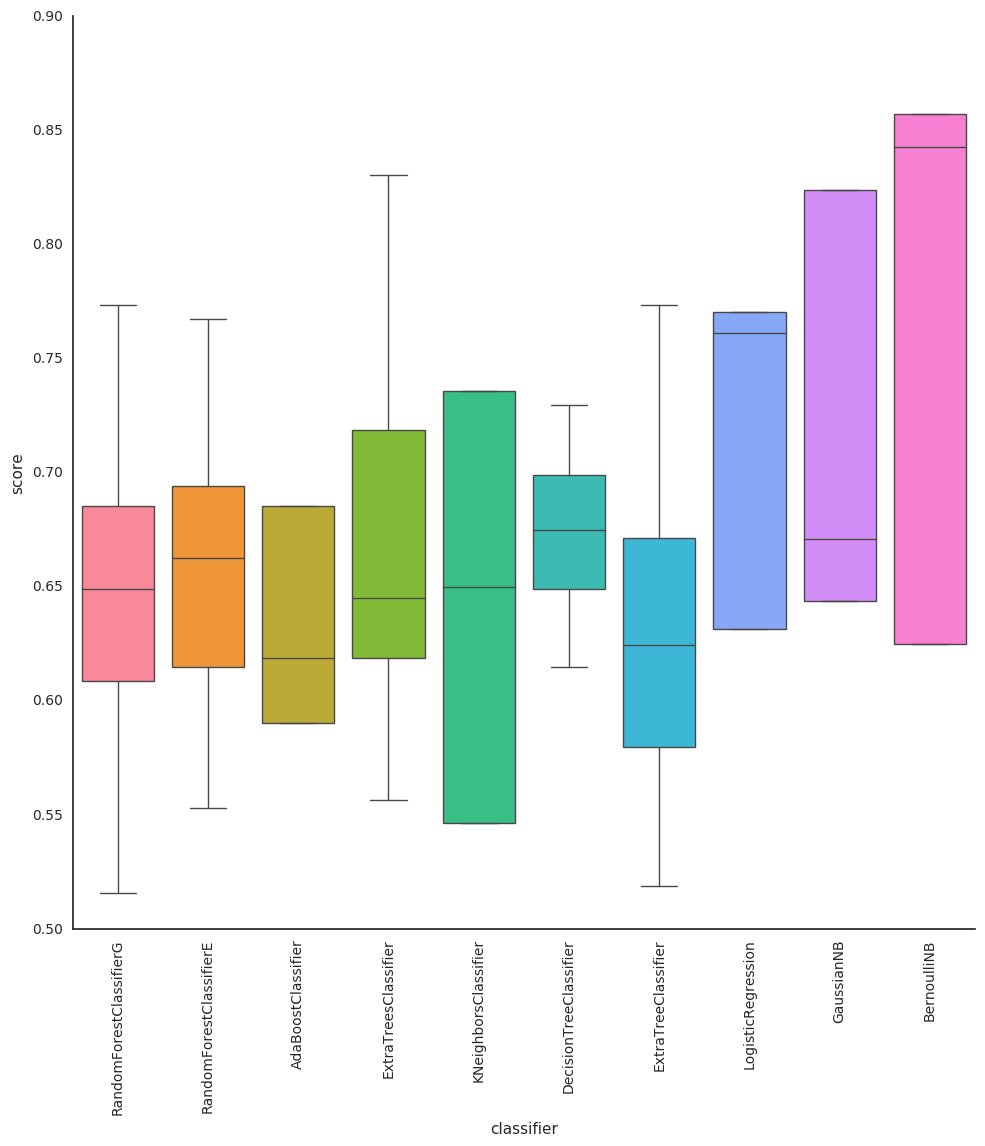

In [20]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               size = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

You can note above, that I did the mapping manually. It let me take a peak at the types of data and so on. In the below I am showing how that problem can be cracked without even doing all of those things. Our dataframe has been changed and transformed, so I will load it again. 

In [21]:
data = pd.read_csv('../input/xAPI-Edu-Data.csv')
df_copy = pd.get_dummies(data)
df_copy.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Class_H,Class_L,Class_M
0,15,16,2,20,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,20,20,3,25,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,10,7,0,30,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,30,25,5,35,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,40,50,12,50,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


This magical command: pd.get_dummies adds a lot of columns to the data, and puts 1 and 0 in those various columns. After which the dataframe looks like following

In [22]:
df_copy.head().T

,0,1,2,3,4
raisedhands,15.0,20.0,10.0,30.0,40.0
VisITedResources,16.0,20.0,7.0,25.0,50.0
AnnouncementsView,2.0,3.0,0.0,5.0,12.0
Discussion,20.0,25.0,30.0,35.0,50.0
gender_F,0.0,0.0,0.0,0.0,0.0
gender_M,1.0,1.0,1.0,1.0,1.0
NationalITy_Egypt,0.0,0.0,0.0,0.0,0.0
NationalITy_Iran,0.0,0.0,0.0,0.0,0.0
NationalITy_Iraq,0.0,0.0,0.0,0.0,0.0
NationalITy_Jordan,0.0,0.0,0.0,0.0,0.0


In [23]:
df1 = df_copy
Y = df1['ParentschoolSatisfaction_Good'].values
df1 = df1.drop(['ParentschoolSatisfaction_Good'],axis=1)
x = df1.values
Xtrain, Xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.50)

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('ExtraTreeClassifier', ExtraTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB())
              ]
allscores = []

#x, Y = mod_df.drop('ParentschoolSatisfaction', axis=1), np.asarray(mod_df['ParentschoolSatisfaction'], dtype="|S6")

for name, classifier in classifiers:
    scores = []
    for i in range(20): # 20 runs
        roc = cross_val_score(classifier, x, Y)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

RandomForestClassifierG 0.933161443481
RandomForestClassifierE 0.932638160508
AdaBoostClassifier 1.0
ExtraTreesClassifier 0.936630235393
KNeighborsClassifier 0.627555438363
DecisionTreeClassifier 1.0
ExtraTreeClassifier 0.792230214071
LogisticRegression 1.0
GaussianNB 0.941834560595
BernoulliNB 0.891703696108


[None, None, None, None, None, None, None, None, None, None]

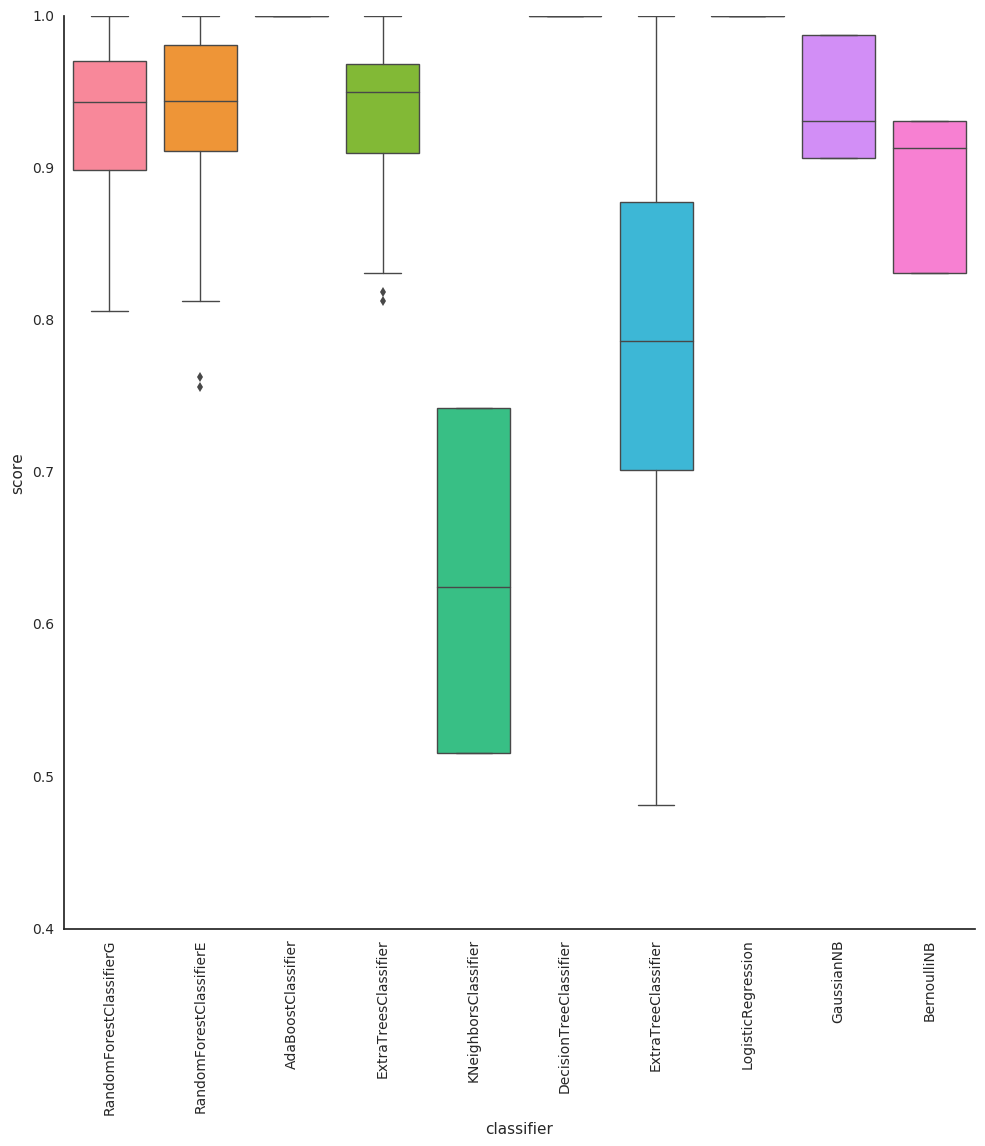

In [25]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               size = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

Note how our scores are now very high: Thats what onehotencoder or pd.get_dummies does. I still have to figure out how to use onehotencoder. 

Why? This is very important to note. Now that I explored a little more, here is what I find out: 

Many learning algorithms either learn a single weight per feature, or they use distances between samples. The former is the case for linear models such as logistic regression, which are easy to explain.

Suppose you have a dataset having only a single categorical feature "nationality", with values "UK", "French" and "US". Assume, without loss of generality, that these are encoded as 0, 1 and 2. You then have a weight w for this feature in a linear classifier, which will make some kind of decision based on the constraint w×x + b > 0, or equivalently w×x < b.

The problem now is that the weight w cannot encode a three-way choice. The three possible values of w×x are 0, w and 2×w. Either these three all lead to the same decision (they're all < b or ≥b) or "UK" and "French" lead to the same decision, or "French" and "US" give the same decision. There's no possibility for the model to learn that "UK" and "US" should be given the same label, with "French" the odd one out.

By one-hot encoding, you effectively blow up the feature space to three features, which will each get their own weights, so the decision function is now w[UK]x[UK] + w[FR]x[FR] + w[US]x[US] < b, where all the x's are booleans. In this space, such a linear function can express any sum/disjunction of the possibilities (e.g. "UK or US", which might be a predictor for someone speaking English).

Similarly, any learner based on standard distance metrics (such as k-nearest neighbors) between samples will get confused without one-hot encoding. With the naive encoding and Euclidean distance, the distance between French and US is 1. The distance between US and UK is 2. But with the one-hot encoding, the pairwise distances between [1, 0, 0], [0, 1, 0] and [0, 0, 1] are all equal to √2.

This is not true for all learning algorithms; decision trees and derived models such as random forests, if deep enough, can handle categorical variables without one-hot encoding.